In [1]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import graphviz 
from sklearn.metrics import confusion_matrix

In [2]:
mcq = pd.read_csv('dataset/multipleChoiceResponses.csv',
                  low_memory=False,
                 skiprows=range(1,2))

In [3]:
mcq.Q6.value_counts()

Student                    5253
Data Scientist             4137
Software Engineer          3130
Data Analyst               1922
Other                      1322
Research Scientist         1189
Not employed                842
Consultant                  785
Business Analyst            772
Data Engineer               737
Research Assistant          600
Manager                     590
Product/Project Manager     428
Chief Officer               360
Statistician                237
DBA/Database Engineer       145
Developer Advocate          117
Marketing Analyst           115
Salesperson                 102
Principal Investigator       97
Data Journalist              20
Name: Q6, dtype: int64

In [4]:
data = mcq[(mcq['Q6'] != 'Student') & (mcq['Q6'] != 'Not employed')].reset_index(drop=True)

### Main language

In [5]:
language,count = [],[]
for column in data.filter(regex=("Q16.*")).columns[:-1]: # remove the last text column part
    language.append(data[column].value_counts().index[0])
    count.append(data[column].value_counts().values[0])    
language_useage = pd.DataFrame({'Language':language,'Count':count})

In [6]:
language_useage.sort_values(by=['Count'],ascending=False).head()

,Count,Language
0,11813,Python
2,6945,SQL
1,5360,R
4,2742,Java
5,2623,Javascript/Typescript


In [7]:
data['Languages'] = data[data.filter(regex=("Q16.*")).columns[:-1]].apply(
    lambda x: ','.join(x.dropna().astype(str)),axis=1)
language = data['Languages'].str.get_dummies(sep=',')

### Main framework

In [8]:
framework, count = [],[]
for column in data.filter(regex=("Q19.*")).columns[:-1]: # remove the last text column part
    framework.append(data[column].value_counts().index[0])
    count.append(data[column].value_counts().values[0])    
framework_useage = pd.DataFrame({'framework':framework,'Count':count})

In [9]:
framework_useage.sort_values(by='Count',ascending=False).head()

,Count,framework
0,9486,Scikit-Learn
1,7620,TensorFlow
2,6329,Keras
12,4869,randomForest
9,4660,Xgboost


In [10]:
data['framework'] = data[data.filter(regex=("Q19.*")).columns[:-1]].apply(
    lambda x: ','.join(x.dropna().astype(str)),axis=1)
frameworks = data['framework'].str.get_dummies(sep=',')

### Main visualization packages

In [11]:
visual, count = [],[]
for column in data.filter(regex=("Q21.*")).columns[:-1]: # remove the last text column part
    visual.append(data[column].value_counts().index[0])
    count.append(data[column].value_counts().values[0])    
visual_useage = pd.DataFrame({'visual_package':visual,'Count':count})

In [12]:
visual_useage.sort_values(by='Count',ascending=False).head()

,Count,visual_package
1,10093,Matplotlib
0,6314,ggplot2
7,6132,Seaborn
5,4606,Plotly
3,2336,Shiny


In [13]:
data['visual_package'] = data[data.filter(regex=("Q21.*")).columns[:-1]].apply(
    lambda x: ','.join(x.dropna().astype(str)),axis=1)
visual_framework = data['visual_package'].str.get_dummies(sep=',')

### Main database

In [14]:
db, count = [],[]
for column in data.filter(regex=("Q29.*")).columns[:-1]: # remove the last text column part
    db.append(data[column].value_counts().index[0])
    count.append(data[column].value_counts().values[0])    
database = pd.DataFrame({'database':db,'Count':count})

In [15]:
database.sort_values(by='Count',ascending=False).head()

,Count,database
9,5261,MySQL
10,3524,PostgresSQL
11,3227,SQLite
8,2863,Microsoft SQL Server
12,2138,Oracle Database


In [16]:
data['database'] = data[data.filter(regex=("Q29.*")).columns[:-1]].apply(
    lambda x: ','.join(x.dropna().astype(str)),axis=1)
databases = data['database'].str.get_dummies(sep=',')

In [17]:
total_dataset = data[['Q5','Q6']].merge(language, how='outer', left_index=True, right_index=True)
total_dataset = total_dataset.merge(frameworks, how='outer', left_index=True, right_index=True)
total_dataset = total_dataset.merge(visual_framework, how='outer', left_index=True, right_index=True)
total_dataset = total_dataset.merge(databases, how='outer', left_index=True, right_index=True)

In [18]:
total_dataset = total_dataset[['Q6','Python', 'R',
                              'SQL','Scikit-Learn','TensorFlow',
                              'Matplotlib','ggplot2',
                              'MySQL','PostgresSQL',
                             ]] # remove Q5 for now
total_dataset.columns = ['Title','Python', 'R',
                              'SQL','Scikit-Learn','TensorFlow',
                              'Matplotlib','ggplot2',
                              'MySQL','PostgresSQL'
                              ] # remove Q5 for now

total_dataset = total_dataset.fillna(value = 'Other')

In [19]:
total_dataset.head()

,Title,Python,R,SQL,Scikit-Learn,TensorFlow,Matplotlib,ggplot2,MySQL,PostgresSQL
0,Consultant,0,0,0,0,0,1,0,0,0
1,Other,0,0,1,0,0,0,0,0,0
2,Data Scientist,0,1,0,0,0,1,1,0,0
3,Data Analyst,0,0,1,0,0,0,0,0,0
4,Data Scientist,1,0,0,1,1,1,0,0,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(total_dataset.loc[:, total_dataset.columns != 'Title'],
                                                    total_dataset['Title'],
                                                    test_size=0.20,
                                                    random_state=42)
# models
clf_tree = tree.DecisionTreeClassifier()
clf_nb = GaussianNB() 


# model fit
clf_tree = clf_tree.fit(X_train,y_train)
clf_nb = clf_nb.fit(X_train,y_train)

In [21]:
prediction_tree = clf_tree.predict(X_test)
prediction_nb = clf_nb.predict(X_test)

In [22]:
print("The decision tree prediction accuracy is: ",clf_tree.score(X_test,y_test)*100,"%")

The decision tree prediction accuracy is:  30.424992963692652 %


In [23]:
print("The naive bayse prediction accuracy is: ",clf_nb.score(X_test,y_test)*100,"%")

The naive bayse prediction accuracy is:  29.97466929355474 %


In [24]:

a = [[1,1,1,1,0,0,0,1,0]]
clf_tree.predict(a)

array(['Data Analyst'], dtype=object)

In [145]:
# dot_data = tree.export_graphviz(clf, out_file='file.dot', 
#                       feature_names=X_test.columns.values,  
#                       class_names=y_test.values,  
#                       filled=True, rounded=True,  
#                      special_characters=True
#                     )  

In [53]:

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

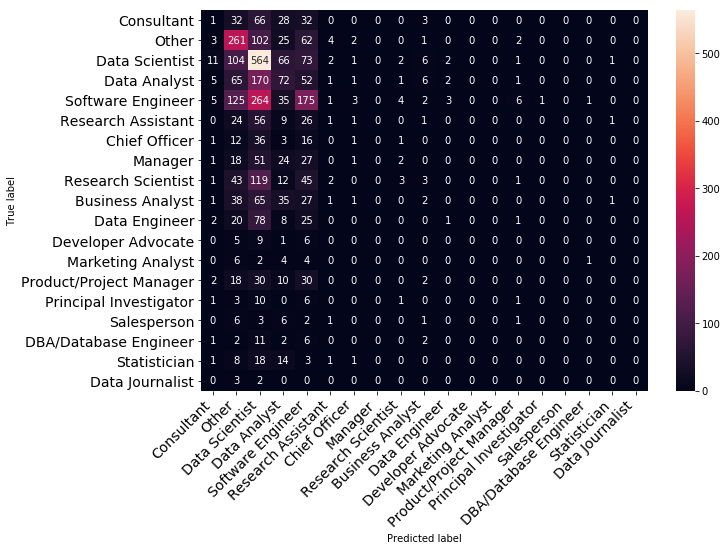

In [54]:
cnf_matrix = confusion_matrix(y_test.values, prediction_tree, labels=total_dataset['Title'].unique())
print_confusion_matrix(cnf_matrix,total_dataset['Title'].unique())

#### Remove certain titles

In [61]:
new_dataset = total_dataset.loc[(total_dataset['Title'] != 'Chief Officer') &
                               (total_dataset['Title'] != 'Manager')&
                               (total_dataset['Title'] != 'Developer Advocate')&
                               (total_dataset['Title'] != 'Marketing Analyst')&
                               (total_dataset['Title'] != 'Principal Investigator')&
                               (total_dataset['Title'] != 'Salesperson')&
                               (total_dataset['Title'] != 'Data Journalist')].reset_index(drop=True)

X_train2, X_test2, y_train2, y_test2 = train_test_split(new_dataset.loc[:, new_dataset.columns != 'Title'],
                                                    new_dataset['Title'],
                                                    test_size=0.20,
                                                    random_state=42)
clf_nb2 = clf_nb.fit(X_train2,y_train2)
prediction_nb2 = clf_nb2.predict(X_test2)

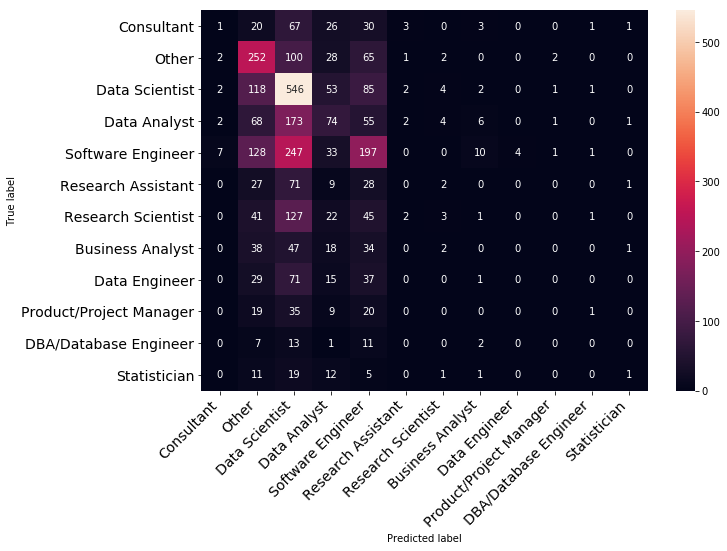

In [62]:
cnf_matrix2 = confusion_matrix(y_test2.values, prediction_nb2, labels=new_dataset['Title'].unique())
print_confusion_matrix(cnf_matrix2,new_dataset['Title'].unique())

In [63]:
print("The naive bayse prediction accuracy is: ",clf_nb2.score(X_test2,y_test2)*100,"%")

The naive bayse prediction accuracy is:  32.81393217231897 %
